# Decision Tree Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('DOS newest.csv')


In [3]:
dataset.head()

,Unnamed: 0,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_http,flag_S0,flag_SF,label
0,0,0,2,0.0,0.0,1.00,150,25,0.17,0.00,0.00,0,0,1,0
1,1,0,13,0.0,0.0,0.08,255,1,0.00,0.00,0.00,0,0,1,0
2,2,0,123,1.0,1.0,0.05,255,26,0.10,1.00,1.00,0,1,0,1
3,3,1,5,0.2,0.2,1.00,30,255,1.00,0.03,0.01,1,0,1,0
4,4,1,30,0.0,0.0,1.00,255,255,1.00,0.00,0.00,1,0,1,0


{'whiskers': [<matplotlib.lines.Line2D at 0x220666de8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x220666def10>,
 'boxes': [<matplotlib.lines.Line2D at 0x220666de460>],
 'medians': [<matplotlib.lines.Line2D at 0x22066d98670>],
 'fliers': [<matplotlib.lines.Line2D at 0x22066d98a00>],
 'means': []}

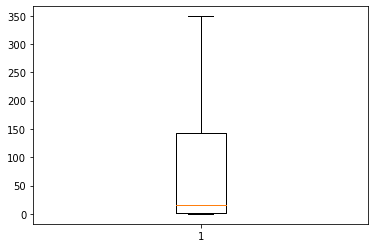

In [4]:
plt.boxplot(dataset['count'])

In [5]:
X = dataset.iloc[:, :-1]
X = pd.DataFrame(X)
y = dataset.iloc[:, -1]
y = pd.DataFrame(y)

In [6]:
X.describe()


,Unnamed: 0,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_http,flag_S0,flag_SF
count,111397.00000,111397.000000,111397.000000,111397.000000,111397.000000,111397.000000,111397.000000,111397.000000,111397.000000,111397.000000,111397.000000,111397.000000,111397.000000,111397.000000
mean,56632.09696,0.438172,78.876011,0.316716,0.315147,0.648423,186.073072,123.455712,0.530646,0.316513,0.310614,0.361715,0.311481,0.593634
std,32695.96334,0.496165,97.114381,0.461828,0.461323,0.442463,95.913645,112.235782,0.446255,0.460934,0.460223,0.480499,0.463101,0.491157
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28309.00000,0.000000,2.000000,0.000000,0.000000,0.090000,94.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56653.00000,0.000000,16.000000,0.000000,0.000000,1.000000,255.000000,79.000000,0.570000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,84949.00000,1.000000,142.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,113269.00000,1.000000,349.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset = pd.DataFrame(dataset)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.962064 (0.017955)
RF: 0.986786 (0.001293)
KNN: 0.941803 (0.001873)
CART: 0.983743 (0.001341)
NB: 0.949442 (0.003235)


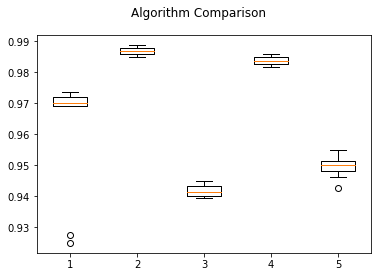

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
dataframe = pd.read_csv('DOS newest.csv')
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 6)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('NB', SVC(kernel = 'rbf', random_state = 0)))
#models.append(('NB', SVC(kernel = 'linear', random_state = 0)))



# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed ,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#ax.set_xticklabels(names)
plt.show()

In [9]:
print(results)

[array([0.97298025, 0.97235189, 0.96938959, 0.97073609, 0.96894075,
       0.92495512, 0.92764811, 0.97091301, 0.96911752, 0.97360625]), array([0.98779174, 0.98617594, 0.98491921, 0.98752244, 0.98590664,
       0.98617594, 0.98770197, 0.98814974, 0.98482808, 0.98868839]), array([0.94497307, 0.94030521, 0.94156194, 0.93976661, 0.94308797,
       0.94129264, 0.93958707, 0.93994075, 0.94317264, 0.94433971]), array([0.98500898, 0.98204668, 0.98159785, 0.98393178, 0.98348294,
       0.98330341, 0.98456014, 0.98518718, 0.98249394, 0.9858156 ]), array([0.95152603, 0.95      , 0.94254937, 0.9505386 , 0.95224417,
       0.9483842 , 0.94793537, 0.95017506, 0.94622498, 0.95484334])]


{'whiskers': [<matplotlib.lines.Line2D at 0x22066f53b50>,
 'caps': [<matplotlib.lines.Line2D at 0x22066f632b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22066f537c0>,
 'medians': [<matplotlib.lines.Line2D at 0x22066f639d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x22066f63d60>,
 'means': []}

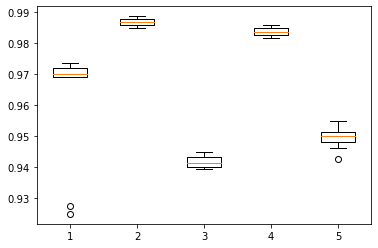

In [10]:
plt.boxplot(results)